Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library("tidymodels")

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.2     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tailor       0.1.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         2.0.0
✔ modeldata    1.5.1     ✔ workflows    1.3.0
✔ parsnip      1.3.3     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [6]:
diabetes_train %>% glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 4, 10, 3, 1, 13, 5, 5, 3, 10, 4, 11, 3,…
$ Glucose                  <dbl> 85, 89, 110, 139, 126, 97, 145, 117, 109, 88,…
$ BloodPressure            <dbl> 66, 66, 92, 80, 88, 66, 82, 92, 75, 58, 78, 6…
$ SkinThickness            <dbl> 29, 23, 0, 0, 41, 15, 19, 0, 26, 11, 31, 33, …
$ Insulin                  <dbl> 0, 94, 0, 0, 235, 140, 110, 0, 0, 54, 0, 192,…
$ BMI                      <dbl> 26.6, 28.1, 37.6, 27.1, 39.3, 23.2, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.191, 1.441, 0.704, 0.487, 0.2…
$ Age                      <dbl> 31, 21, 30, 57, 27, 22, 57, 38, 60, 22, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**
The "Outcome" column; this is likely a binary indicator of whether or not the individual has diabetes.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

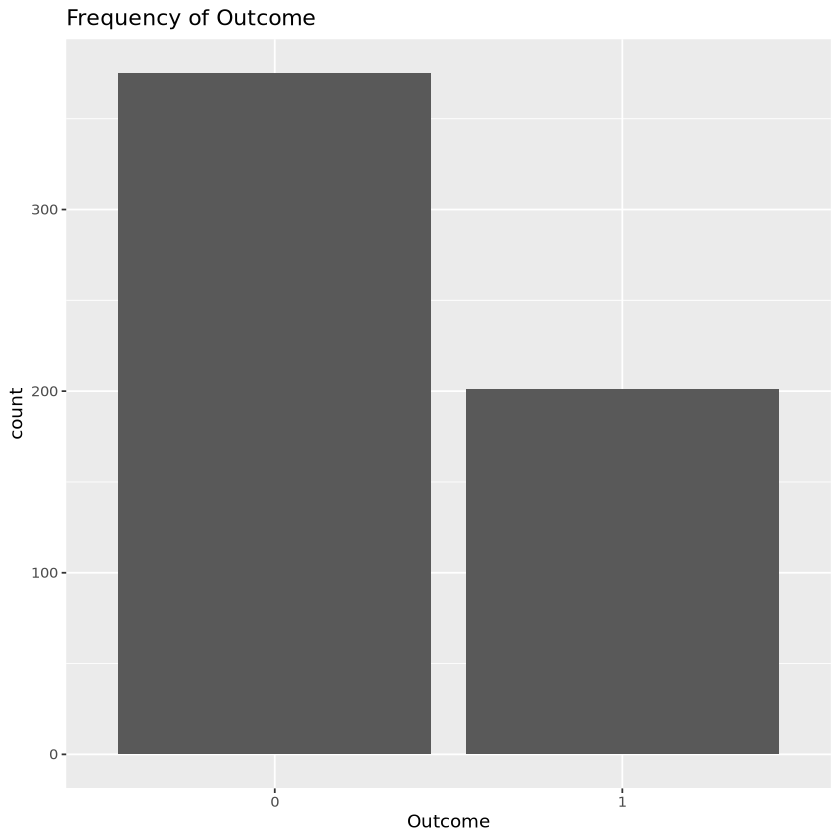

In [8]:
ggplot(diabetes_train, aes(x=Outcome)) + geom_bar() + labs(title="Frequency of Outcome")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**
No, it is not, we have much more 0's than 1's

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [9]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

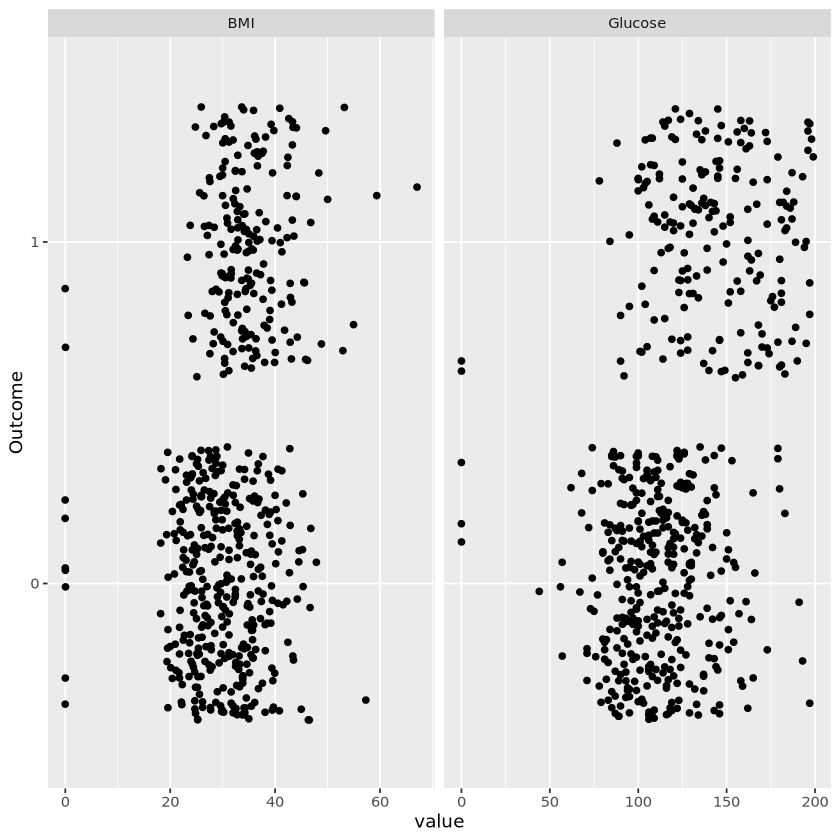

In [21]:

ggplot(plot_df, aes(x=value,y=Outcome))+geom_jitter()+facet_wrap(~name, ncol=2, scales='free_x')


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**
Previously, glucose and BMI were on different scales that "stretched" to display the minimum and maximum of each category on the left and right side of the panel respectively. When you remove the `scales = 'free_x'` argument, glucose and BMI are put on the same scale (graphs have the same min/max value); however, since BMI has a much smaller range than glucose, this causes it to look more "compressed" on the graph.

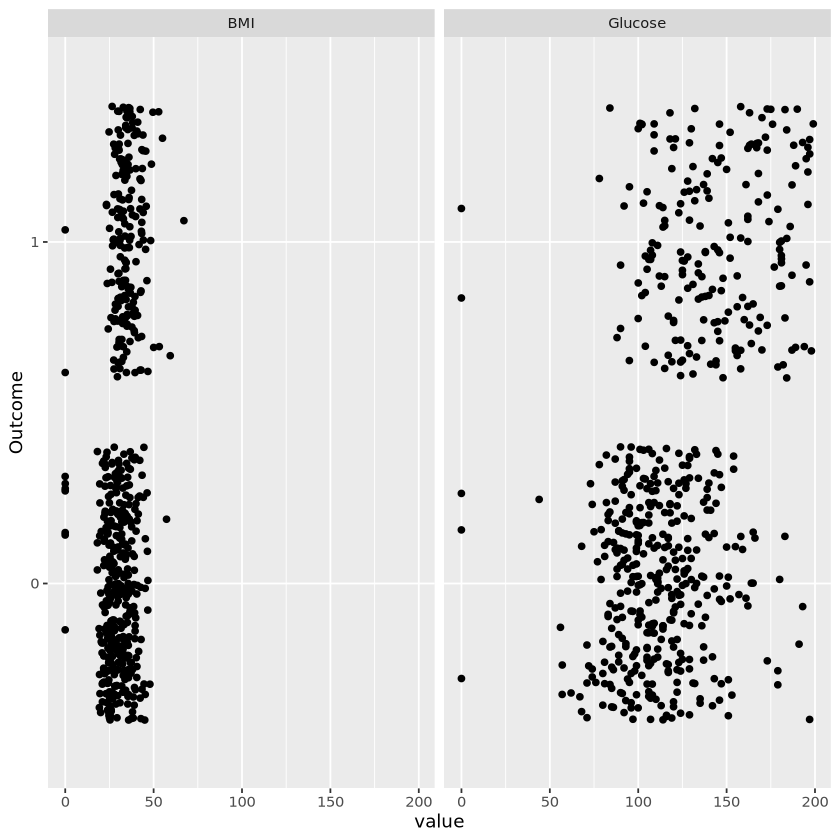

In [22]:
ggplot(plot_df, aes(x=value,y=Outcome))+geom_jitter()+facet_wrap(~name, ncol=2)

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [16]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [23]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [24]:
#diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)
diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 111  33
         1  14  34

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

In our test data, 33+34=67 individuals had diabetes (truth = 1)

Of those that actually had diabetes, 34 of them were predicted to have diabetes by our model

Out of the individuals predicted to have diabetes, 14 did not.
